In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
comments =pd.read_csv(r"C:\Users\PC\Desktop\Data Analytics Real -WOrld Projects in Python\additional_data\UScomments.csv",on_bad_lines="skip")

C:\Users\PC\AppData\Local\Temp\ipykernel_18052\3187115018.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments =pd.read_csv(r"C:\Users\PC\Desktop\Udemy\Data Analytics Real -WOrld Projects in Python\Youtube_project_shan_singh_Udemy\UScomments.csv",on_bad_lines="skip")


In [3]:
comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [5]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)

In [7]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2.. Perform Sentiment Analysis and WordCloud
    
    In short , Sentiment analysis is all about analyszing sentiments of Users

In [8]:
!pip install nltk

In [9]:
import nltk

In [10]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
sia = SentimentIntensityAnalyzer()

In [13]:
comments["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [14]:
sia.polarity_scores("MY FAN . attendance")['compound']

0.4648

In [15]:
scores=[]
for comment in comments["comment_text"]:
    score=sia.polarity_scores(str(comment))['compound']
    scores.append(score)
    

In [16]:
comments["polarity"] = scores

In [17]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000


In [18]:
filter_pos = (comments["polarity"]>= 0.8)&(comments["polarity"]<=1.0)

In [21]:
comments_positive = comments[filter_pos]

In [22]:
comments_positive.shape

(64310, 5)

In [23]:
filter_neg = (comments["polarity"]>=-1.0)&(comments["polarity"]<=-0.8)

In [24]:
comments_neg= comments[filter_neg]

In [25]:
comments_neg.shape

(16148, 5)

In [26]:
comments.shape

(691374, 5)

In [27]:
!pip install wordcloud

In [28]:
from wordcloud import WordCloud , STOPWORDS

In [29]:
WordCloud().generate

<bound method WordCloud.generate of <wordcloud.wordcloud.WordCloud object at 0x0000026DAD699990>>

In [30]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [31]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

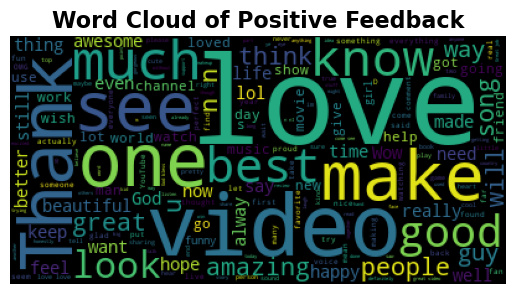

In [106]:
plt.imshow(wordcloud)
plt.title('Word Cloud of Positive Feedback', fontsize=16, fontweight='bold') # Add this line

plt.axis('off')

In [33]:
total_comments_neg = ' '.join(comments_neg['comment_text'])

In [34]:
wordcloud_neg = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_neg)

(-0.5, 399.5, 199.5, -0.5)

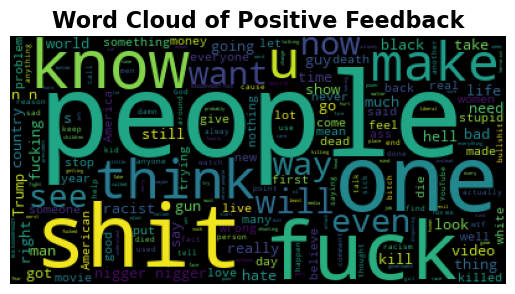

In [107]:
plt.imshow(wordcloud_neg)
plt.title('Word Cloud of Positive Feedback', fontsize=16, fontweight='bold') # Add this line

plt.axis('off')

## 3.. Perform Emoji's Analysis

In [36]:
!pip install emoji==2.14.1

In [37]:
import emoji

In [38]:
emoji.__version__

'2.14.1'

In [39]:
emoji_info=emoji.emoji_list('trending 😉😭')

In [40]:
[item["emoji"] for item in emoji_info]

['😉', '😭']

In [41]:
comment = 'trending 😉'

In [42]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [43]:
all_emojis=[]
for comment in comments["comment_text"]:
    list=[item["emoji"]for item in emoji.emoji_list(comment)]
    all_emojis.extend(list)
    
    

In [44]:
all_emojis[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [45]:
### NOw we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [46]:
from collections import Counter

In [47]:
top10_emojis = Counter(all_emojis).most_common(10)

In [48]:
top10_emojis

[('😂', 36987),
 ('😍', 33453),
 ('❤️', 16911),
 ('❤', 14167),
 ('🔥', 8694),
 ('😭', 8398),
 ('😘', 5545),
 ('💖', 5359),
 ('💕', 5147),
 ('👍', 4251)]

In [49]:
emojis = [emoji  for emoji,count in top10_emojis]
counts = [count  for emoji,count in top10_emojis]
print(emojis)
print (counts)

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']
[36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]


In [50]:
!pip install plotly

In [51]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [52]:
trace = go.Bar(x=emojis , y=counts)

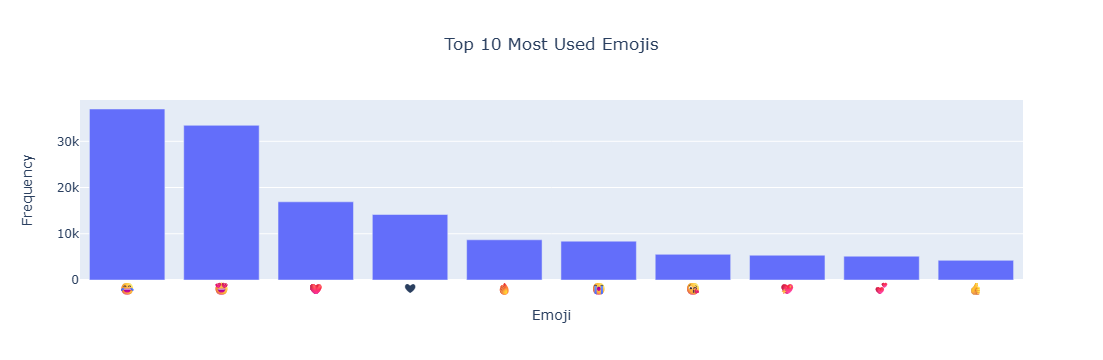

In [108]:
layout = go.Layout(
    title='Top 10 Most Used Emojis',  # <-- This is where you set the title
    title_x=0.5, # This centers the title
    xaxis_title='Emoji',
    yaxis_title='Frequency'
)

# Create the figure with the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
iplot(fig)

In [54]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

In [55]:
import os

In [ ]:
files = os.listdir(r'C:\Users\PC\Desktop\Data Analytics Real -WOrld Projects in Python\additional_data')

In [57]:
csvs = [file for file in files  if '.csv' in file ]

In [58]:
csvs

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [59]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [60]:
full_df = pd.DataFrame()

In [61]:
type(csvs[0])

str

In [ ]:
path  = r'C:\Users\PC\Desktop\Data Analytics Real -WOrld Projects in Python\additional_data'

In [63]:
full_df = pd.concat( [pd.read_csv(path+'/'+current_file,encoding='iso-8859-1') for current_file in csvs],ignore_index= True)#Pandas garde les index d’origine de chaque DataFrame.

In [64]:
full_df.shape

(375942, 16)

In [65]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [66]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [67]:
full_df = full_df.drop_duplicates()

In [68]:
full_df[full_df.duplicated()].shape

(0, 16)

In [ ]:
full_df.to_csv(r'C:\Users\PC\Desktop\Data Analytics Real -WOrld Projects in Python\test.csv',index= False)


In [ ]:
full_df.to_json(r'C:\Users\PC\Desktop\Data Analytics Real -WOrld Projects in Python\test.json',index= False)

In [71]:
from sqlalchemy import create_engine 

In [ ]:
engine = create_engine(r'sqlite:///C:\Users\PC\Desktop\Data Analytics Real -WOrld Projects in Python\test.sqlite')


In [73]:
full_df[0:1000].to_sql('Users',con = engine ,if_exists='append')

1000

In [ ]:
json_df = pd.read_json(r'C:\Users\PC\Desktop\additional_data\US_category_id.json')

In [75]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [76]:
cat_dict = {}
for i in json_df['items'].values:
    cat_dict[i['id']] = i['snippet']['title']
    


In [77]:
cat_dict 


{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [78]:
print(full_df['category_id'].dtype)


int64


In [79]:
first_key = next(iter(cat_dict))
print(type(first_key))

<class 'str'>


In [80]:
cat_dict = {int(k): v for k, v in cat_dict.items()}


In [81]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
    

In [82]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375936,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",People & Blogs
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


In [83]:
full_df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
category_name             object
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

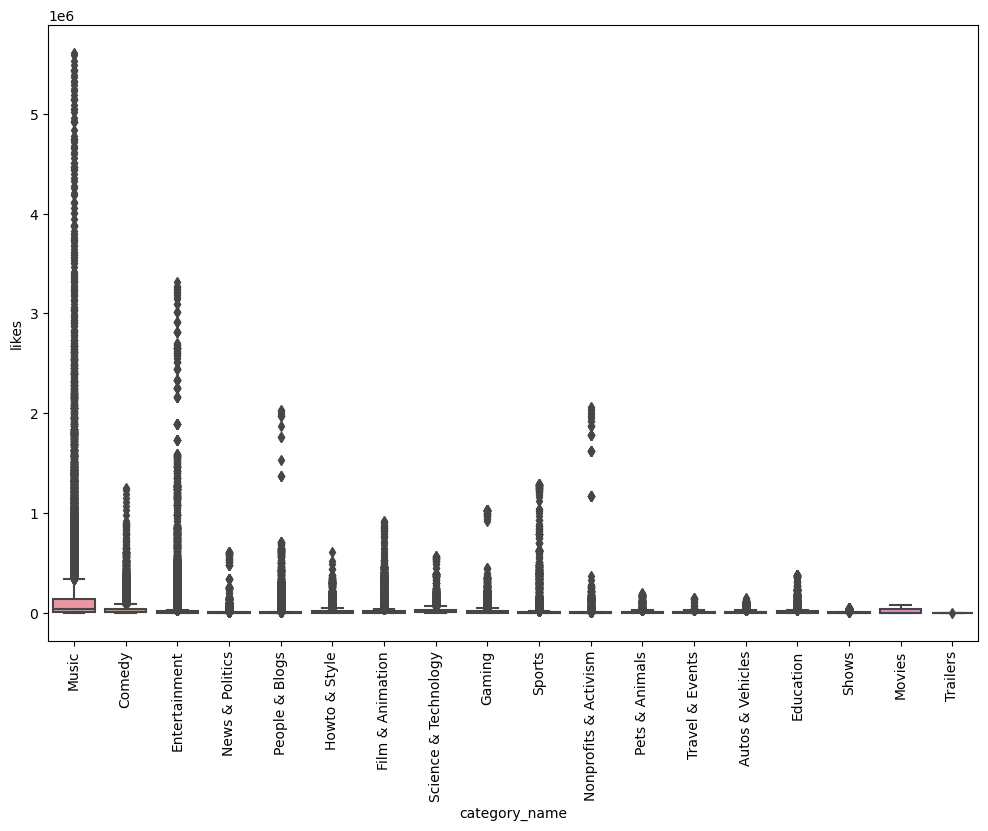

In [84]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

##  Find out whether audience is engaged or not


In [85]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

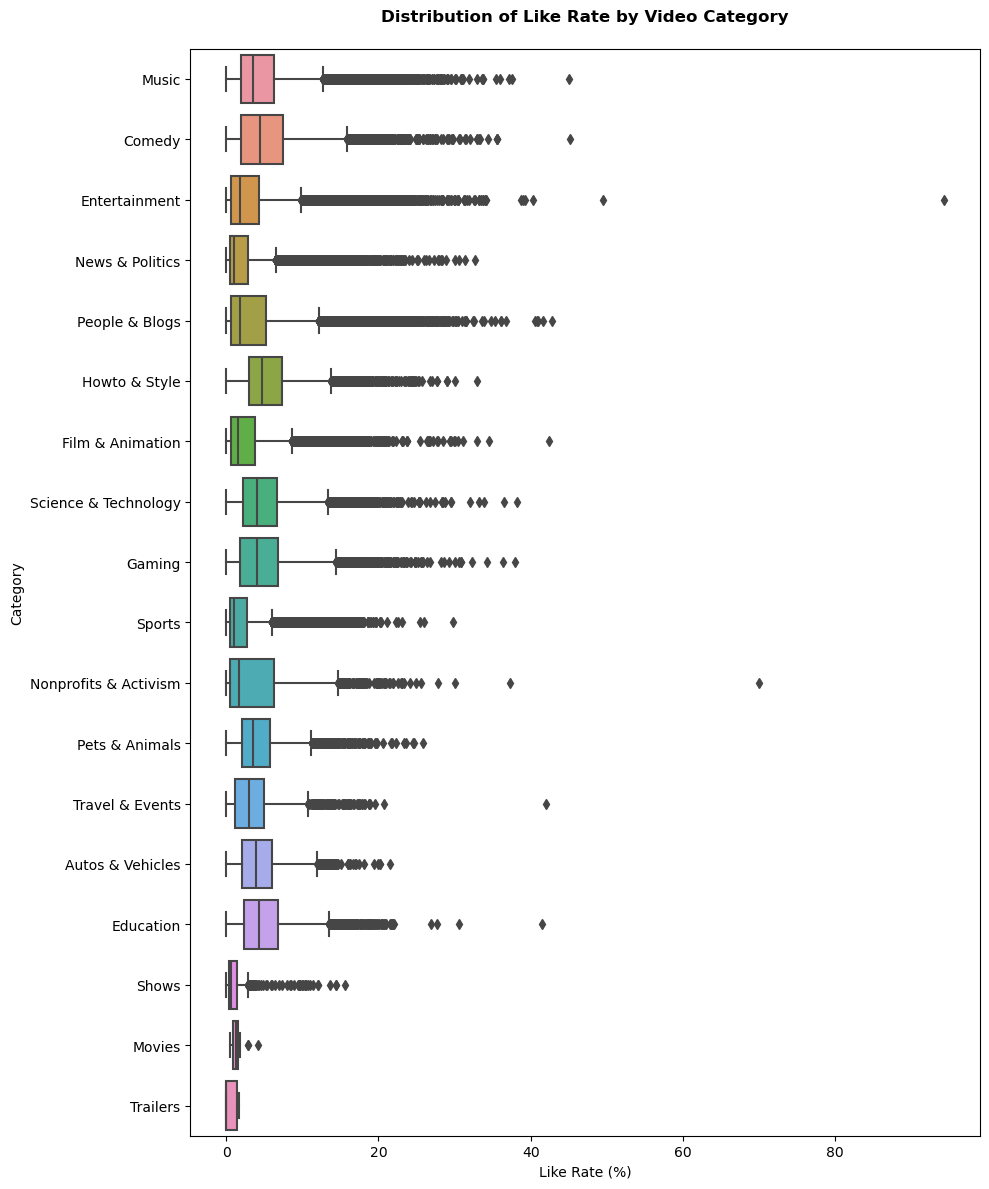

In [109]:
plt.figure(figsize=(10, 12)) # Adjust size for better readability
# Create a horizontal boxplot by switching x and y
sns.boxplot(y='category_name', x='like_rate', data=full_df, orient='h')
plt.title('Distribution of Like Rate by Video Category', fontweight='bold', pad=20)
plt.xlabel('Like Rate (%)')
plt.ylabel('Category')
plt.tight_layout() # Ensures labels fit in the figure
plt.show()

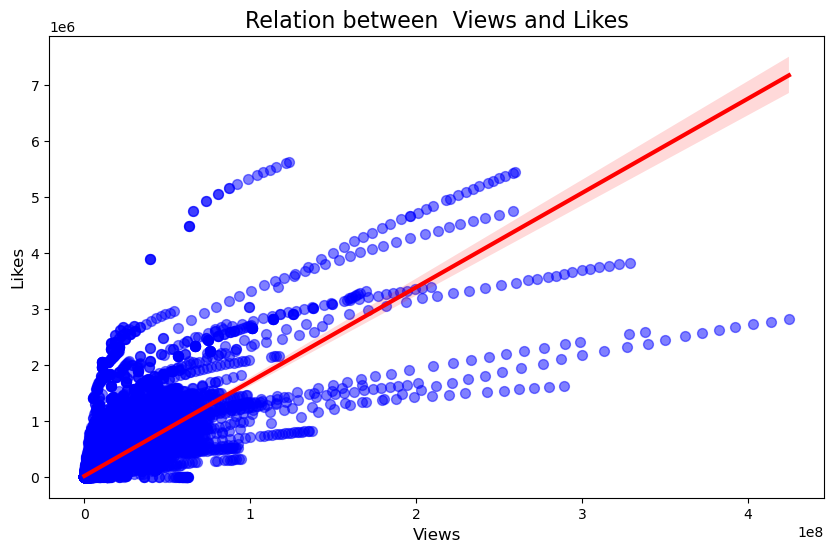

In [87]:


plt.figure(figsize=(10,6))
sns.regplot(
    x='views', 
    y='likes', 
    data=full_df, 
    scatter_kws={'s':50, 'alpha':0.5, 'color':'blue'},  # points
    line_kws={'color':'red', 'lw':3}                    # ligne de régression
)
plt.title("Relation between  Views and Likes", fontsize=16)
plt.xlabel("Views", fontsize=12)
plt.ylabel("Likes", fontsize=12)
plt.show()


In [88]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


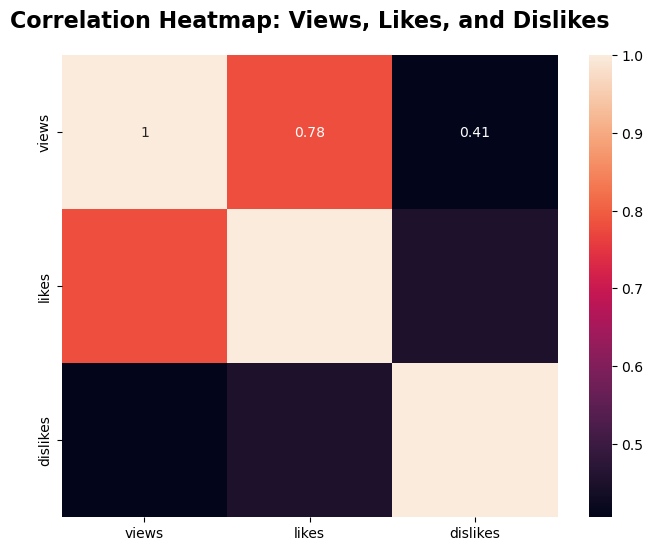

In [110]:
plt.figure(figsize=(8, 6)) # Optional: Adjusts the figure size
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)
plt.title('Correlation Heatmap: Views, Likes, and Dislikes', fontsize=16, fontweight='bold', pad=20)
plt.show()

## .. Which channels have the largest number of trending videos?

In [90]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [91]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [92]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [93]:
cdf = cdf.rename(columns={0:'total_videos'})

In [94]:
import plotly.express as px

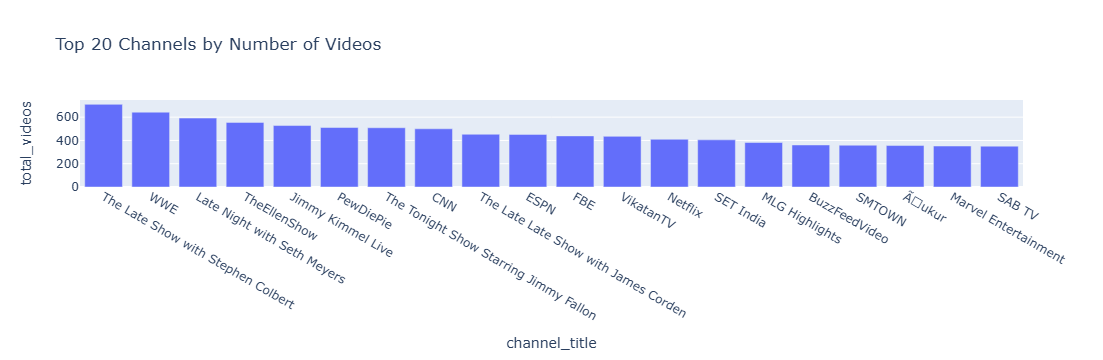

In [112]:
fig = px.bar(data_frame=cdf[0:20],
             x='channel_title',
             y='total_videos',
             title='Top 20 Channels by Number of Videos') # <-- Title added here

fig.show()

## . Does Punctuations in title and tags have any relation with views, likes, dislikes comments?


In [96]:
import string

In [97]:
full_df['title']

0               Eminem - Walk On Water (Audio) ft. BeyoncÃ©
1                             PLUSH - Bad Unboxing Fan Mail
2         Racist Superman | Rudy Mancuso, King Bach & Le...
3                                  I Dare You: GOING BALD!?
4               Ed Sheeran - Perfect (Official Music Video)
                                ...                        
375936    BTS Plays With Puppies While Answering Fan Que...
375938                           True Facts : Ant Mutualism
375939    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
375940                  How Black Panther Should Have Ended
375941    Official Call of DutyÂ®: Black Ops 4 âÂ Mult...
Name: title, Length: 339525, dtype: object

In [98]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [99]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [100]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [101]:
sample = full_df[0:10000]

In [102]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [103]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

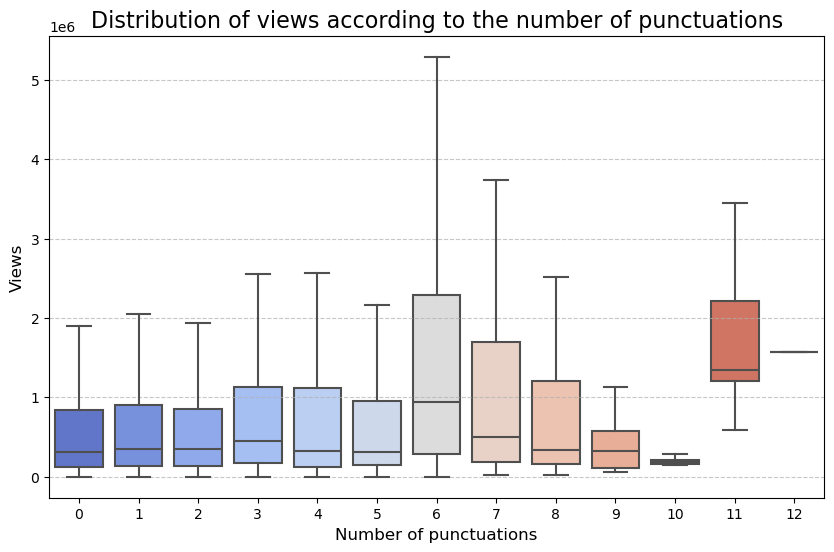

In [104]:

plt.figure(figsize=(10,6))
sns.boxplot(
    x='count_punc', 
    y='views', 
    data=sample,
    palette="coolwarm",    # couleurs plus élégantes
    showfliers=False       # masque les outliers
)
plt.title("Distribution of views according to the number of punctuations", fontsize=16)
plt.xlabel("Number of punctuations", fontsize=12)
plt.ylabel("Views", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### While most content receives modest views regardless of punctuation, certain punctuation counts (especially 6 and 11) are associated with occasional very high-performing content. This suggests that punctuation may have some effect on engagement, but other factors likely play a stronger role.


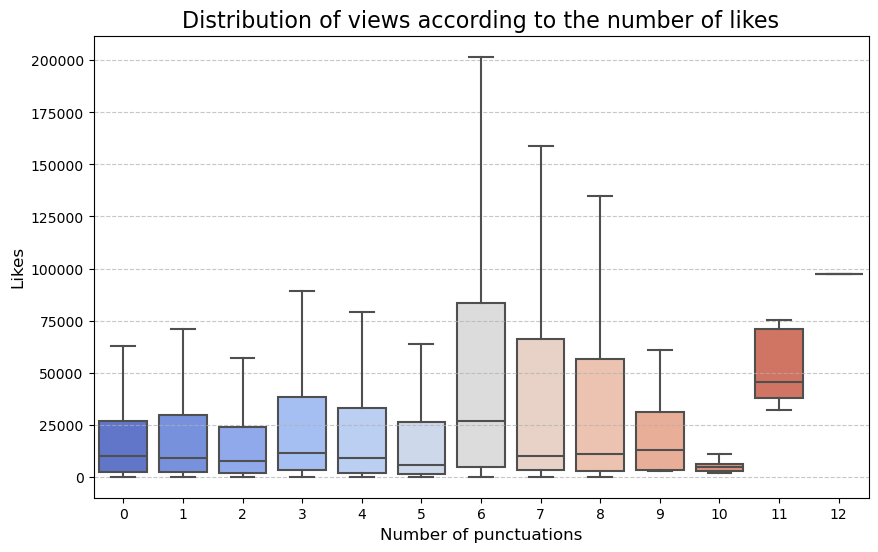

In [105]:

plt.figure(figsize=(10,6))
sns.boxplot(
    x='count_punc', 
    y='likes', 
    data=sample,
    palette="coolwarm",    # couleurs plus élégantes
    showfliers=False       # masque les outliers
)
plt.title("Distribution of views according to the number of likes", fontsize=16)
plt.xlabel("Number of punctuations", fontsize=12)
plt.ylabel("Likes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### ### The number of punctuations may have some effect on likes, but the relationship is not linear: sometimes more punctuations are associated with higher likes, but results vary depending on the exact count.